# Import packages

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix




## Import Dataset

In [33]:
file_path = 'C:/Users/Admin/Documents/MVC/Cursos/PG Applied AI & ML/03. Supervised ML/Group_Assignment/case_8_games_training.csv'
#file_path = 'case_8_games_test_masked.csv'
#file_path = "/Users/goncalogago/Desktop/POS_G_AI_ML/Trabalho_Supervised_learning/case_8_games_training.csv"
training_data = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

In [3]:
# Checks the dimensions of the dataset
training_data.shape

(220923, 55)

In [34]:
# Verify first 5 observations
training_data.head()

,app_id,average,mediantime,owners,players,price,date,action,adventure,anime,...,treyarch,tripwireinteractive,ubisoftdev,valvedev,metascore,userscore,positive,negative,original,dummy
0,10,661.0,74.0,12656037,368822.0,9.99,01/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,66949.0,1490.0,01/09/2016,0
1,10,690.0,71.0,12617378,363721.0,9.99,02/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,66989.0,1489.0,02/09/2016,0
2,10,681.0,74.0,12570654,358609.0,9.99,03/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67033.0,1491.0,03/09/2016,0
3,10,656.0,72.0,12507511,356800.0,9.99,04/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67087.0,1493.0,04/09/2016,0
4,10,588.0,71.0,12524101,360397.0,9.99,05/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67137.0,1495.0,05/09/2016,0


In [5]:
# Verify unique values in variables
qtde_columns = len(training_data.columns)
valores_unicos = []
for i in training_data.columns[0:qtde_columns].tolist():
    print(i, ':', len(training_data[i].astype(str).value_counts()))
    valores_unicos.append(len(training_data[i].astype(str).value_counts()))  

app_id : 7726
average : 2479
mediantime : 2625
owners : 57040
players : 10722
price : 212
date : 30
action : 2
adventure : 2
anime : 2
casual : 2
earlyaccess : 2
freetoplay : 2
indie : 2
multiplayer : 2
openworld : 2
singleplayer : 2
sports : 2
strategy : 2
zombies : 2
kgames : 2
activision : 2
bethesdasoftworks : 2
electronicarts : 2
rockstargames : 2
sega : 2
squareenix : 2
thqnordic : 2
telltalegames : 2
valve : 2
warnerbros : 2
bioware : 2
capcom : 2
cdprojektred : 2
dice : 2
firaxisgames : 2
gearboxsoftware : 2
iointeractive : 2
lucasarts : 2
mumbojumbo : 2
obsidianentertainment : 2
relicentertainment : 2
squareenixdev : 2
telltalegamesdev : 2
thecreativeassembly : 2
treyarch : 2
tripwireinteractive : 2
ubisoftdev : 2
valvedev : 2
metascore : 67
userscore : 100
positive : 10909
negative : 4241
original : 31
dummy : 1


In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220923 entries, 0 to 220922
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   app_id                 220923 non-null  int64  
 1   average                134839 non-null  float64
 2   mediantime             134839 non-null  float64
 3   owners                 220923 non-null  int64  
 4   players                134839 non-null  float64
 5   price                  188148 non-null  float64
 6   date                   220923 non-null  object 
 7   action                 220923 non-null  int64  
 8   adventure              220923 non-null  int64  
 9   anime                  220923 non-null  int64  
 10  casual                 220923 non-null  int64  
 11  earlyaccess            220923 non-null  int64  
 12  freetoplay             220923 non-null  int64  
 13  indie                  220923 non-null  int64  
 14  multiplayer            220923 non-nu

In [10]:
training_data.describe()

,app_id,average,mediantime,owners,players,price,action,adventure,anime,casual,...,thecreativeassembly,treyarch,tripwireinteractive,ubisoftdev,valvedev,metascore,userscore,positive,negative,dummy
count,220923.000000,134839.000000,134839.000000,2.209230e+05,1.348390e+05,188148.000000,220923.000000,220923.000000,220923.000000,220923.000000,...,220923.000000,220923.000000,220923.000000,220923.000000,220923.000000,42236.000000,195179.000000,1.951790e+05,195179.000000,220923.0
mean,299663.635769,200.269017,183.275247,2.249986e+05,1.310701e+04,10.371443,0.407907,0.315132,0.048166,0.251613,...,0.000136,0.001086,0.000272,0.003531,0.002852,72.734255,73.117651,1.483184e+03,257.044759,0.0
std,141529.582621,481.524754,550.143061,1.520186e+06,2.030210e+05,9.453715,0.491447,0.464570,0.214118,0.433941,...,0.011652,0.032942,0.016478,0.059314,0.053325,10.920140,19.983056,1.933221e+04,1969.491754,0.0
min,10.000000,1.000000,1.000000,4.650000e+02,4.650000e+02,0.190000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000e+00,0.000000,0.0
25%,239090.000000,30.000000,26.000000,3.861000e+03,5.330000e+02,4.990000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,62.000000,1.900000e+01,6.000000,0.0
50%,332800.000000,103.000000,80.000000,1.788900e+04,1.018000e+03,8.990000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,77.000000,6.900000e+01,24.000000,0.0
75%,401810.000000,211.000000,176.000000,9.652500e+04,2.806000e+03,12.990000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,89.000000,3.290000e+02,98.000000,0.0
max,511380.000000,19979.000000,20082.000000,8.308348e+07,1.135156e+07,300.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,100.000000,1.340212e+06,108025.000000,0.0


average        86084
mediantime     86084
players        86084
price          32775
metascore     178687
userscore      25744
positive       25744
negative       25744
original       25744
dtype: int64


<Axes: >

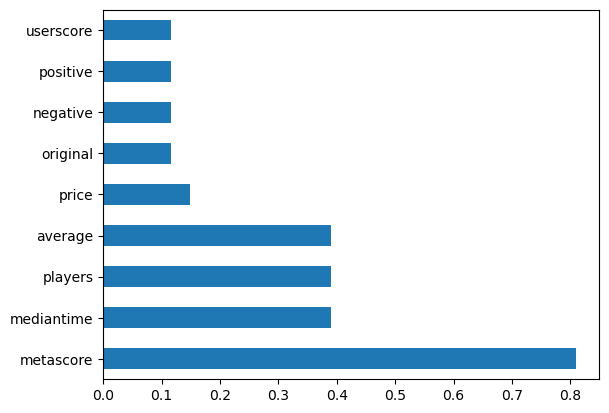

In [6]:
#Check missing values
missing_values = training_data.isna().sum()
missing_valuesnot0 = missing_values[missing_values > 0]
print(missing_valuesnot0)

# Checks the percentage of missing values ​​in each variable
missing_vales_order = training_data.isna().sum().sort_values(ascending = False)
missing_percentages=missing_vales_order/len(training_data)
missing_percentages[missing_percentages!=0]

# Print null values
missing_percentages[missing_percentages!=0].plot(kind='barh')

In [40]:
# Transform objects fields in DateTime
training_data['date'] = pd.to_datetime(training_data['date'], format='%d/%m/%Y', errors='coerce')
training_data['original'] = pd.to_datetime(training_data['original'], format='%d/%m/%Y', errors='coerce')

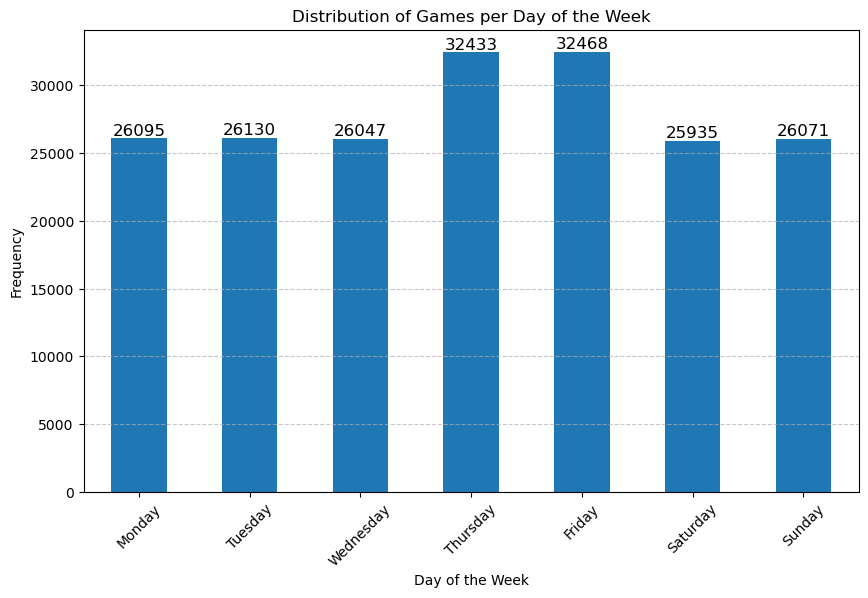

In [41]:
#Distribution of Games per Day of the Week 
training_data.dropna(subset=['original'], inplace=True)

training_data['day_of_week'] = training_data['original'].dt.day_name()

day_counts = training_data['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

plt.figure(figsize=(10, 6))
bars = day_counts.plot(kind='bar')
for bar in bars.patches:# Add text annotations on top of each bar
    bars.annotate(f'{bar.get_height()}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=12, color='black')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Distribution of Games per Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

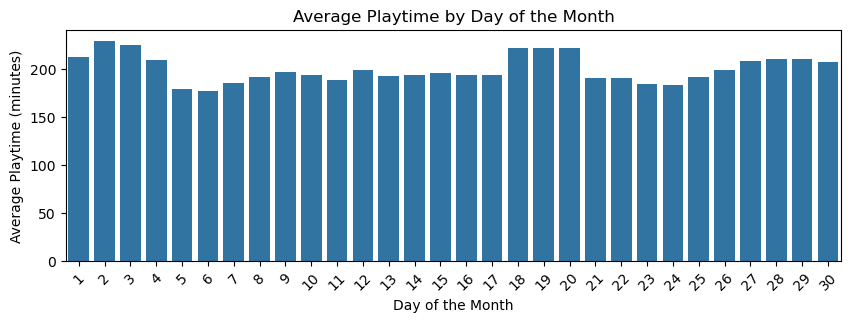

In [8]:
# The objective is to predict the average playtime per day

training_data['day_of_month'] = training_data['date'].dt.day

# Agrupar por dia do mês e calcular a média dos minutos de jogo
average_time_per_day = training_data.groupby('day_of_month')['average'].mean()  # Use .median() para mediana

# Plotar os dados
plt.figure(figsize=(10, 3))
sns.barplot(x=average_time_per_day.index, y=average_time_per_day.values)
plt.title('Average Playtime by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Playtime (minutes)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

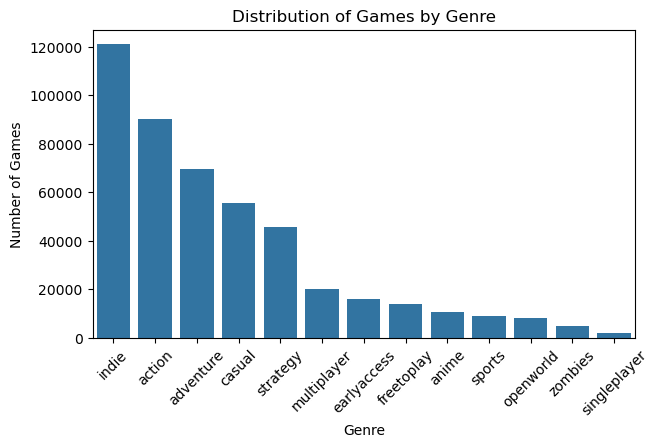

In [9]:
# Genre and Publisher Distribution
genre_columns = ['action', 'adventure', 'anime', 'casual', 'earlyaccess', 'freetoplay', 'indie', 'multiplayer', 'openworld', 'singleplayer', 'sports', 'strategy', 'zombies']

# Count of games by genre
genre_distribution = training_data[genre_columns].sum().sort_values(ascending=False)

# Plotting Genre Distribution
plt.figure(figsize=(7, 4))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values)
plt.title('Distribution of Games by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

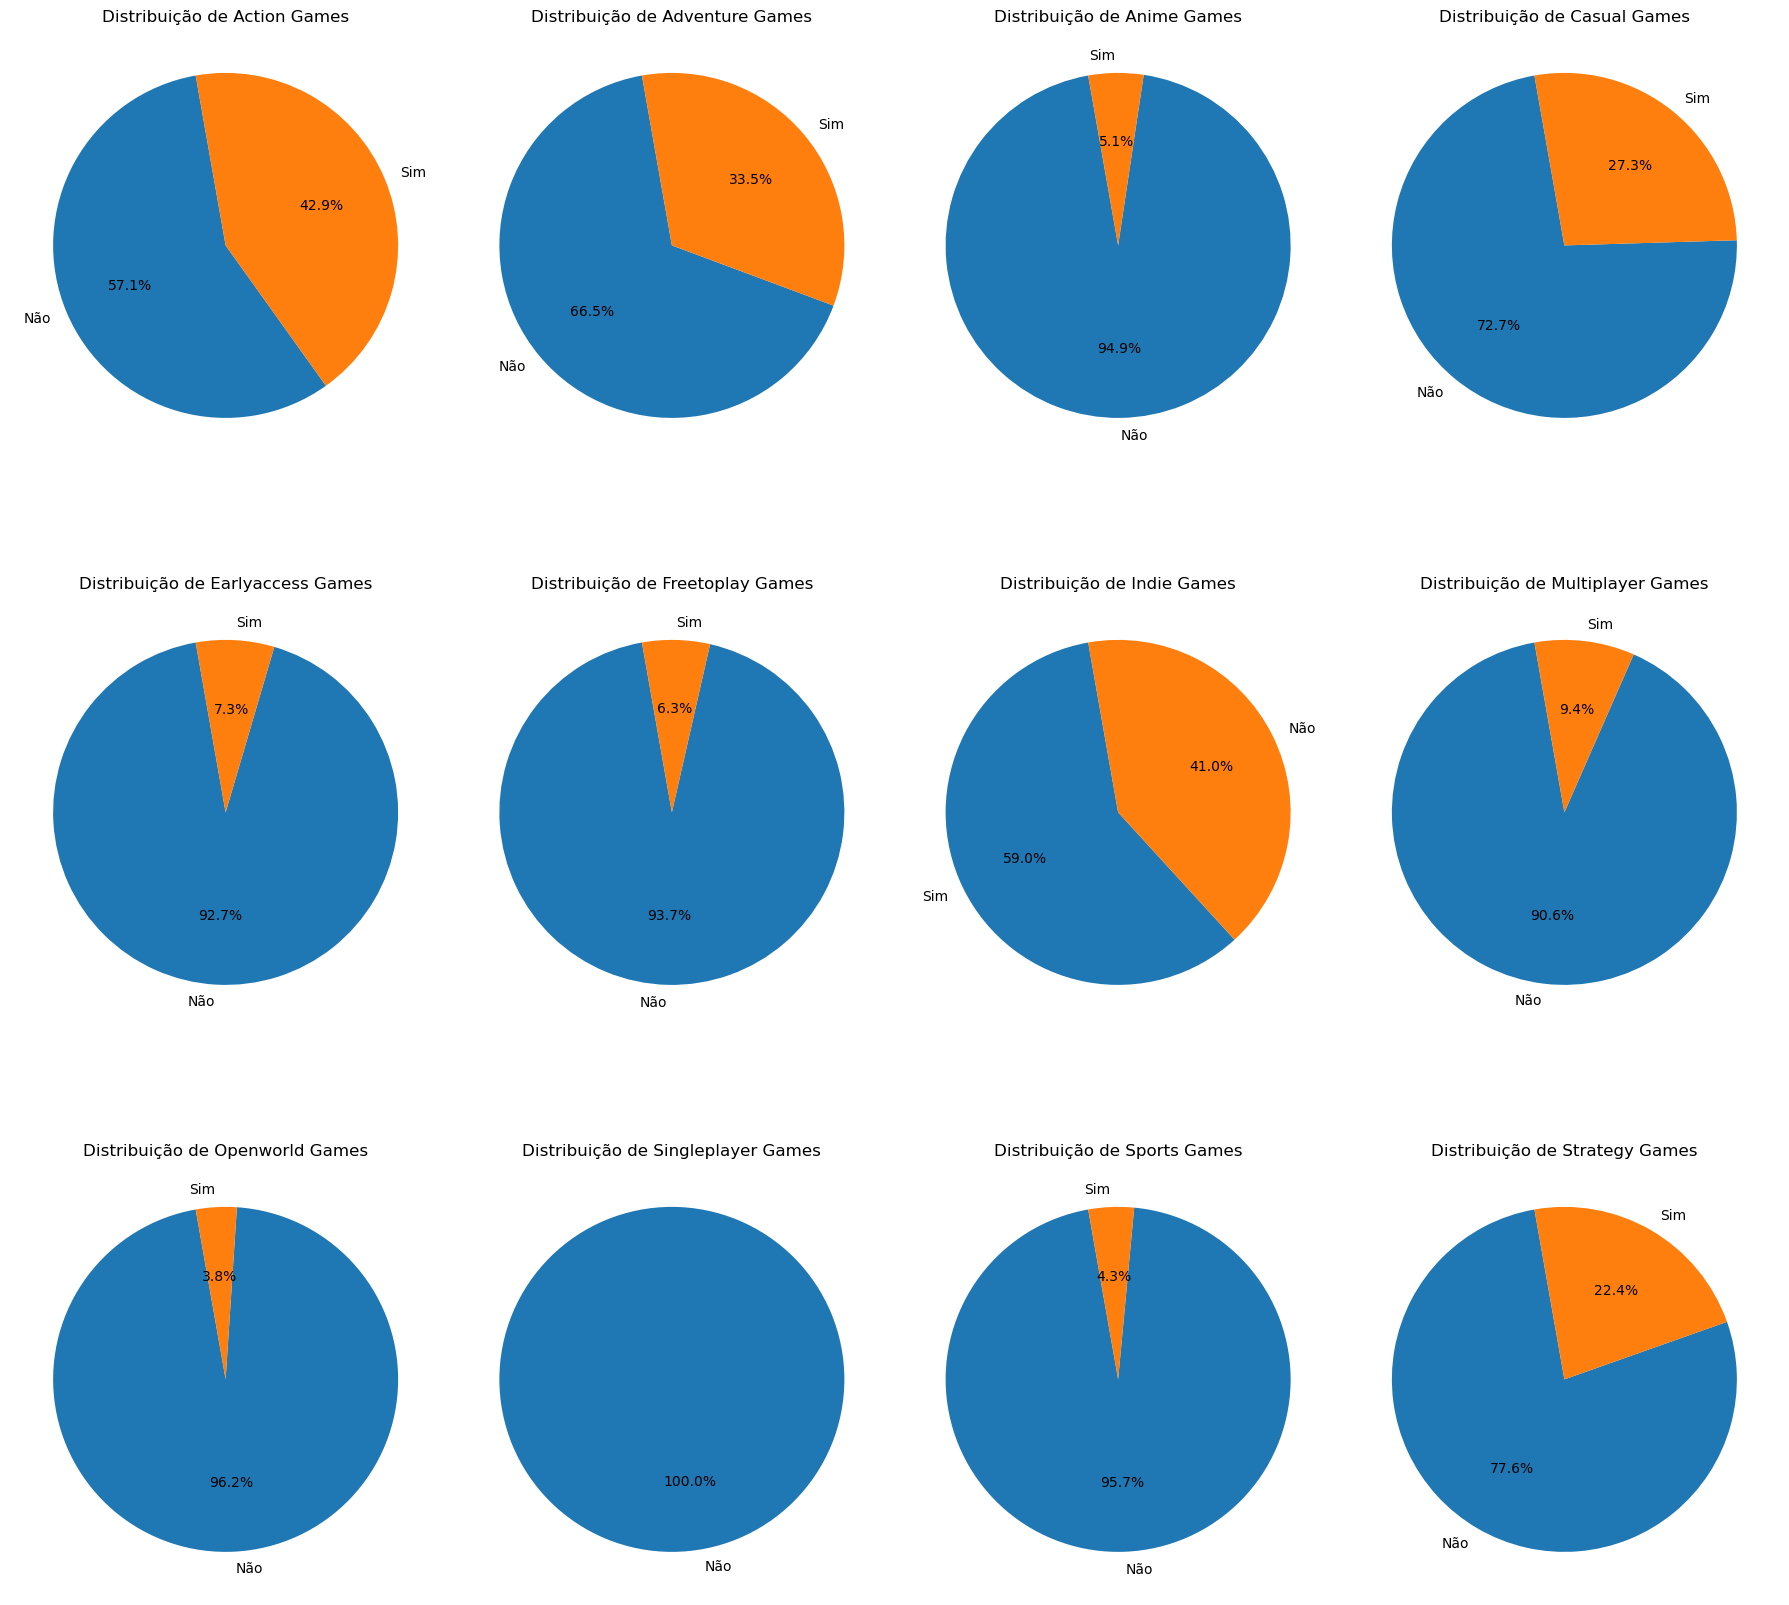

In [26]:
# Substituir 1 por 'Sim' e 0 por 'Não' nas variáveis categóricas binárias
training_data[genre_columns] = training_data[genre_columns].replace({1: 'Sim', 0: 'Não'})

# Criar os gráficos de pizza para as variáveis categóricas binárias (0 ou 1) após a substituição
fig, axes = plt.subplots(3, 4, figsize=(18, 18))

for var, ax in zip(genre_columns, axes.flatten()):
    counts = training_data[var].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%0.1f%%', startangle=100)
    ax.set_title(f'Distribuição de {var.capitalize()} Games')

plt.tight_layout()
plt.show()

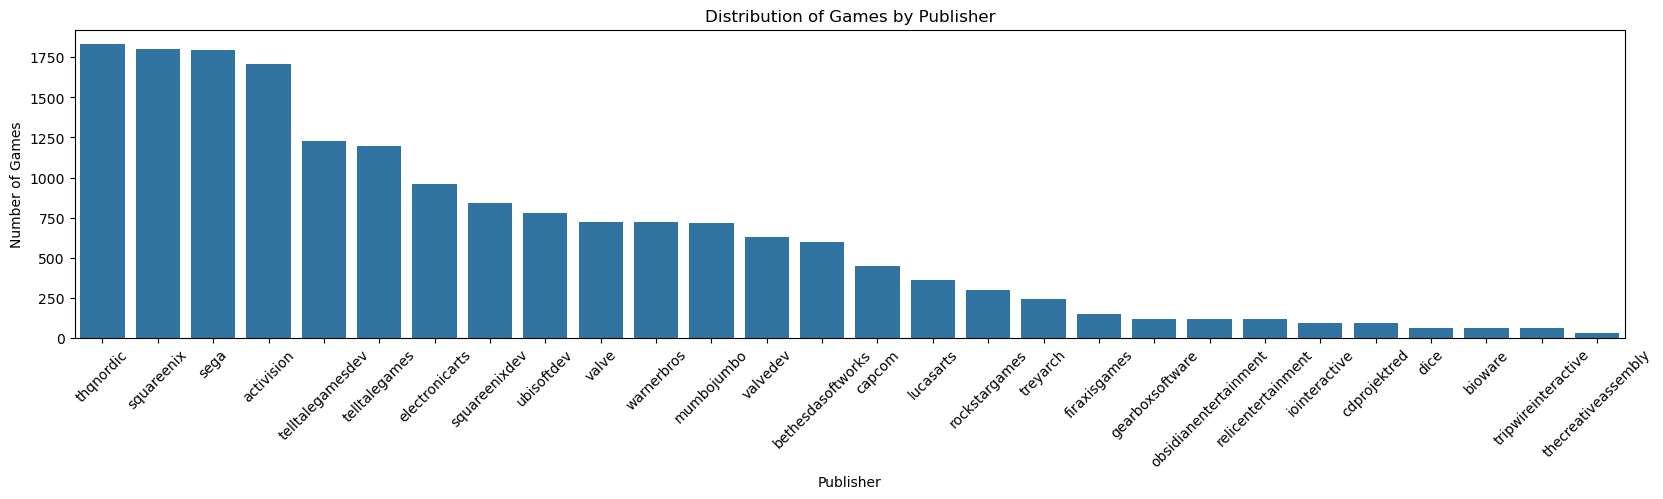

thqnordic           1831
squareenix          1803
sega                1797
activision          1710
telltalegamesdev    1230
telltalegames       1200
electronicarts       960
squareenixdev        840
ubisoftdev           780
valve                720
dtype: int64


In [12]:
# Plotting Publisher Distribution
publisher_columns = ['activision', 'bethesdasoftworks', 'electronicarts', 'rockstargames', 'sega', 'squareenix', 'thqnordic', 'telltalegames', 'valve', 'warnerbros', 'bioware', 'capcom', 'cdprojektred', 'dice', 'firaxisgames', 'gearboxsoftware', 'iointeractive', 'lucasarts', 'mumbojumbo', 'obsidianentertainment', 'relicentertainment', 'squareenixdev', 'telltalegamesdev', 'thecreativeassembly', 'treyarch', 'tripwireinteractive', 'ubisoftdev', 'valvedev']

# Count of games by publisher
publisher_distribution = training_data[publisher_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 4))
sns.barplot(x=publisher_distribution.index, y=publisher_distribution.values)
plt.title('Distribution of Games by Publisher')
plt.xticks(rotation=45)
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.show()

# Top 10 publishers
top_10_publishers = publisher_distribution.nlargest(10)
print(top_10_publishers)

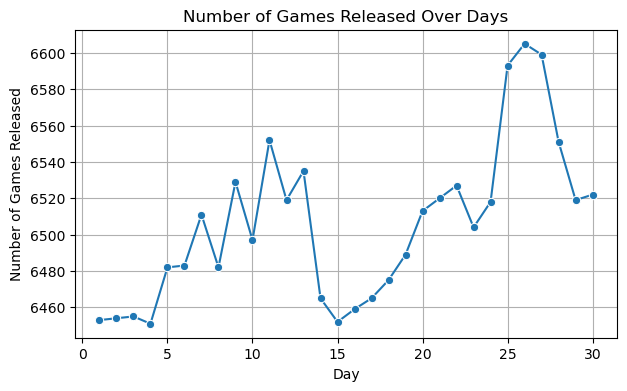

In [27]:
# Number of Games Released Over Days
training_data['day'] = training_data['original'].dt.day
games_per_day = training_data['day'].value_counts().sort_index()

plt.figure(figsize=(7, 4))
sns.lineplot(x=games_per_day.index, y=games_per_day.values, marker='o')
plt.title('Number of Games Released Over Days')
plt.xlabel('Day')
plt.ylabel('Number of Games Released')
plt.grid(True)
plt.show()

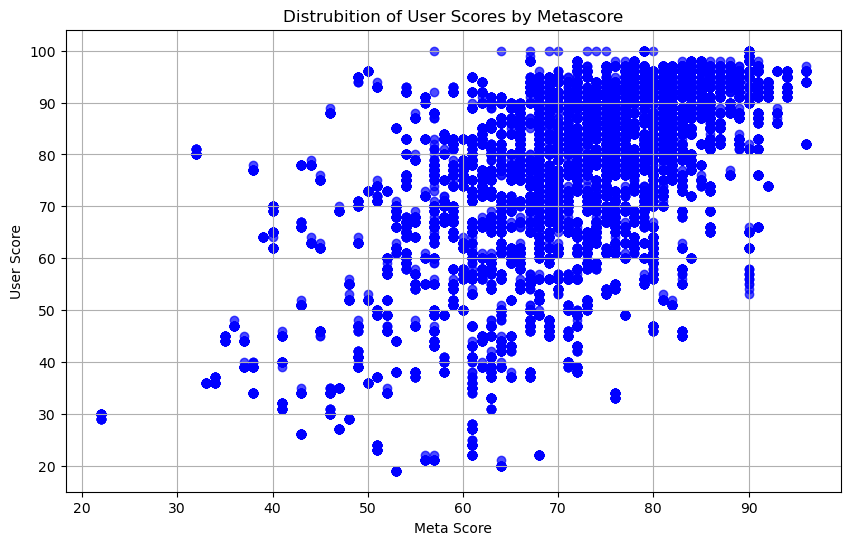

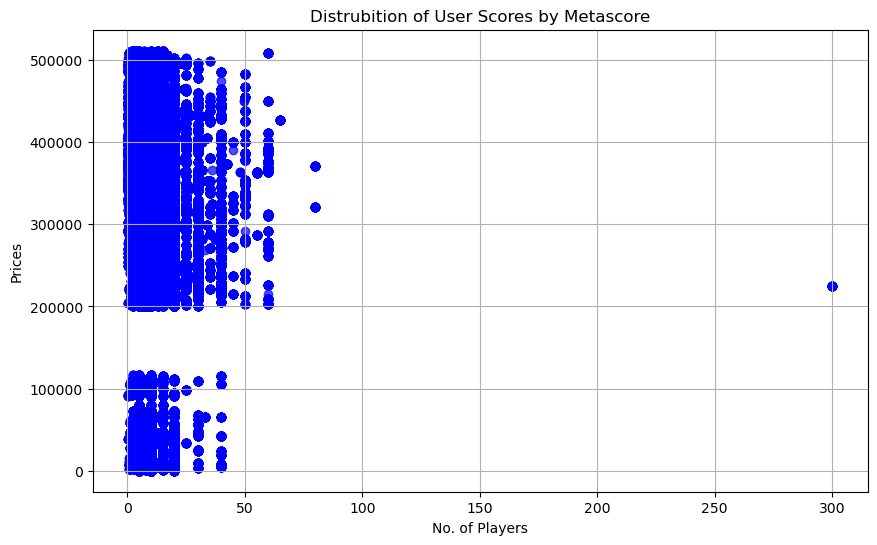

In [17]:
#Distrubition of User Scores by Metascore
plt.figure(figsize=(10, 6))
plt.scatter(training_data['metascore'], training_data['userscore'], alpha=0.7, c='b')
plt.xlabel('Meta Score')
plt.ylabel('User Score')
plt.title('Distrubition of User Scores by Metascore')
plt.grid(True)
plt.show()

#Distrubition of Players by Price
plt.figure(figsize=(10, 6))
plt.scatter(training_data['price'], training_data['app_id'], alpha=0.7, c='b')
plt.xlabel('No. of Players')
plt.ylabel('Prices')
plt.title('Distrubition of User Scores by Metascore')
plt.grid(True)
plt.show()


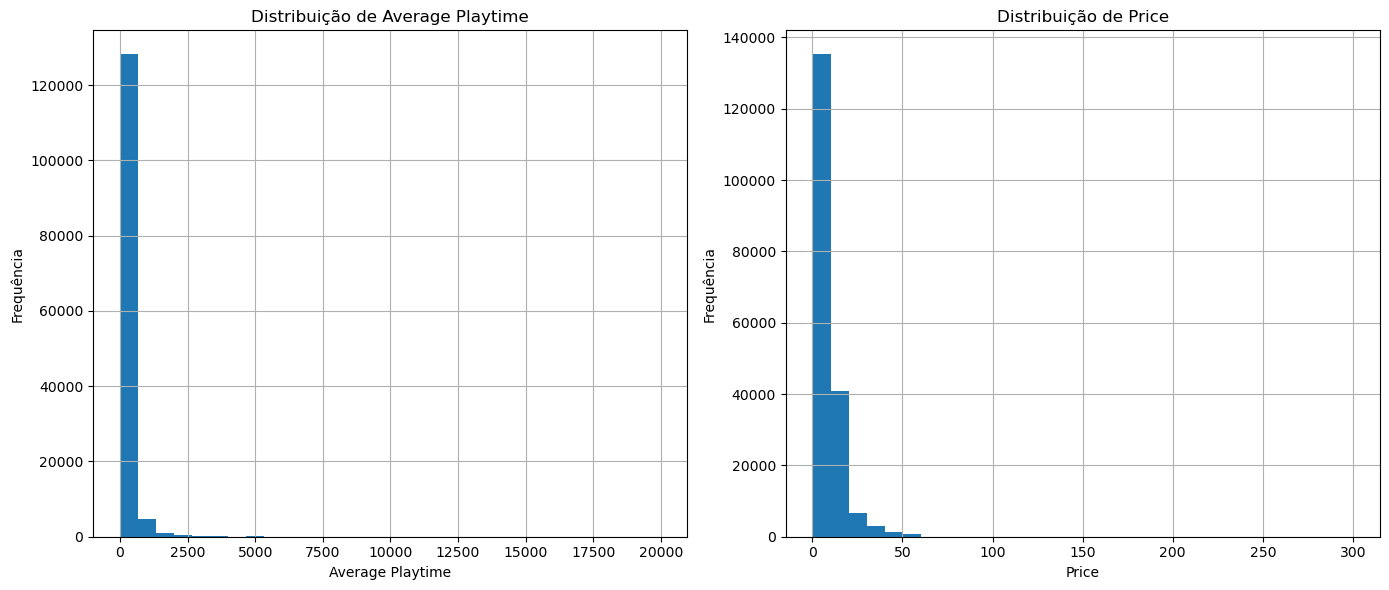

In [16]:
# Exemplo de histograma para variáveis numéricas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

training_data['average'].hist(bins=30, ax=axes[0])
axes[0].set_title('Distribuição de Average Playtime')
axes[0].set_xlabel('Average Playtime')
axes[0].set_ylabel('Frequência')

training_data['price'].hist(bins=30, ax=axes[1])
axes[1].set_title('Distribuição de Price')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

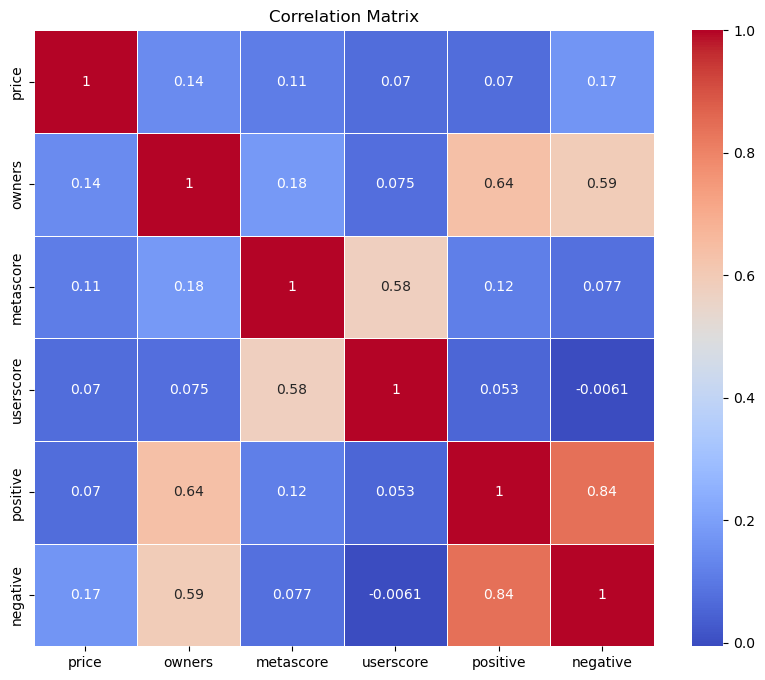

In [15]:
# Correlation Analysis
correlation_matrix = training_data[['price', 'owners', 'metascore', 'userscore', 'positive', 'negative']].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Select covariates
independent_vars = ['mediantime','owners', 'players', 'price', 'metascore', 'userscore', 'positive', 'negative', 'original', 'earlyaccess', 'freetoplay', 'multiplayer', 'openworld', 'action', 'adventure', 'anime', 'casual', 'indie', 'sports', 'strategy', 'zombies', 'activision', 'bethesdasoftworks', 'electronicarts', 'rockstargames', 'sega', 'squareenix', 'thqnordic', 
                       'telltalegames', 'valve', 'warnerbros', 'bioware', 'capcom', 'cdprojektred', 'dice', 'firaxisgames', 
                       'gearboxsoftware', 'iointeractive', 'lucasarts', 'mumbojumbo', 'obsidianentertainment', 'relicentertainment', 
                       'squareenixdev', 'telltalegamesdev', 'thecreativeassembly', 'treyarch', 'tripwireinteractive', 'ubisoftdev', 
                       'valvedev']
average_corr = training_data[independent_vars].corrwith(training_data['average'])

print('Zero-order correlation with dependent variable:')

display(average_corr)


Zero-order correlation with dependent variable:


mediantime               0.916364
owners                   0.069794
players                  0.062505
price                    0.141682
metascore                0.076228
userscore               -0.001353
positive                 0.054488
negative                 0.068261
original                -0.001552
earlyaccess             -0.011137
freetoplay               0.044982
multiplayer              0.018731
openworld                0.045665
action                  -0.078103
adventure               -0.036149
anime                    0.014086
casual                  -0.031613
indie                   -0.094188
sports                   0.022639
strategy                 0.094214
zombies                  0.009674
activision               0.000613
bethesdasoftworks        0.014328
electronicarts           0.005761
rockstargames            0.010186
sega                     0.024258
squareenix               0.011806
thqnordic                0.004962
telltalegames            0.004582
valve         

## Data Cleaning and Transformation

Outliers

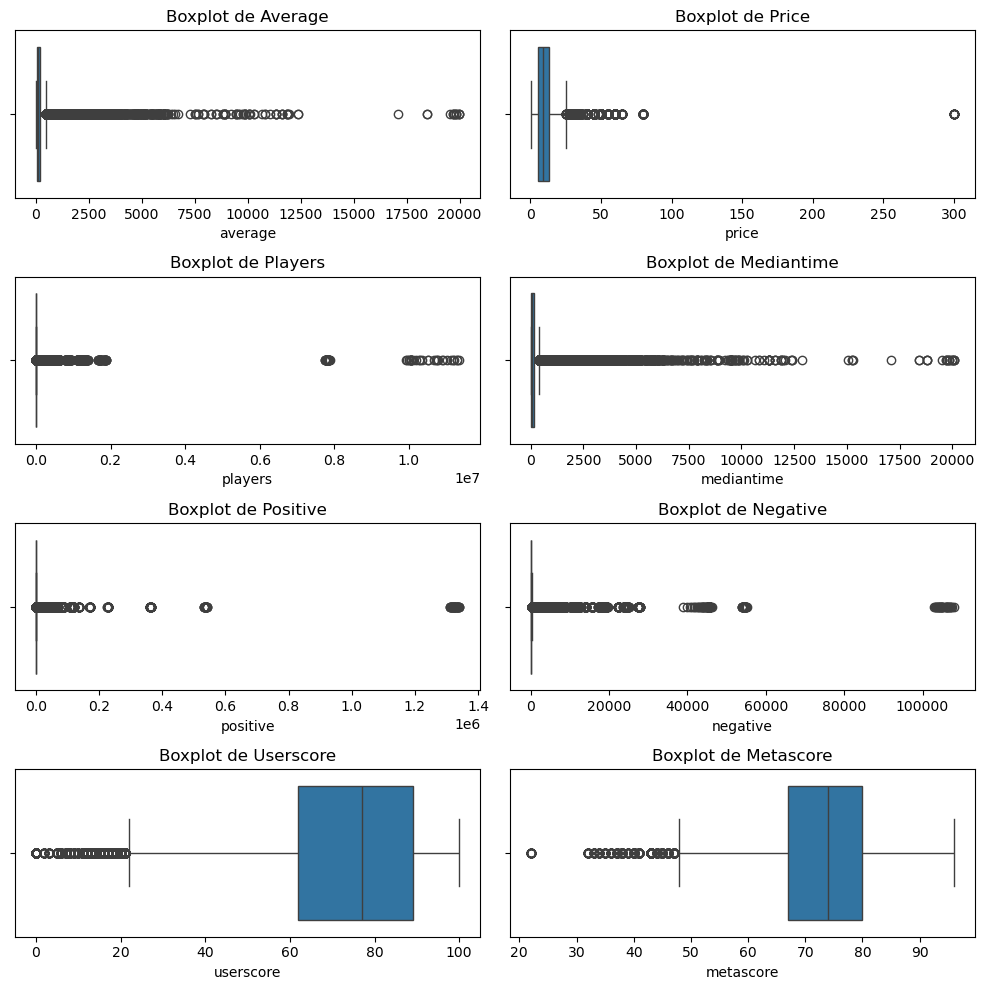

In [31]:
#Outliers
numeric_columns = ['average', 'price', 'players', 'mediantime', 'positive','negative', 'userscore', 'metascore']
 
# Criar boxplots para visualizar outliers
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()
 
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=training_data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col.capitalize()}')
 
plt.tight_layout()
plt.show()

Missing Values - Replaced by median

In [32]:
#Check missing values
missing_values = training_data.isna().sum()
missing_valuesnot0 = missing_values[missing_values > 0]
print(missing_valuesnot0)

# Fill missing values for 'price', 'metascore', 'userscore', 'positive', 'negative' with the median of their columns
#training_data['price'].fillna(training_data['price'].median(), inplace=True)
#training_data['metascore'].fillna(training_data['metascore'].median(), inplace=True)
#training_data['userscore'].fillna(training_data['userscore'].median(), inplace=True)
#training_data['positive'].fillna(training_data['positive'].median(), inplace=True)
#training_data['negative'].fillna(training_data['negative'].median(), inplace=True)

average        71325
mediantime     71325
players        71325
price          14219
metascore     154792
dtype: int64


In [36]:
missing_average_by_app_id = training_data.groupby('app_id')['average'].apply(lambda x: x.isnull().mean())
 
app_ids_to_drop = missing_average_by_app_id[missing_average_by_app_id > 0.80].index
 
 
training_data_cleaned = training_data[~training_data['app_id'].isin(app_ids_to_drop)]
training_data_cleaned

,app_id,average,mediantime,owners,players,price,date,action,adventure,anime,...,treyarch,tripwireinteractive,ubisoftdev,valvedev,metascore,userscore,positive,negative,original,dummy
0,10,661.0,74.0,12656037,368822.0,9.99,01/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,66949.0,1490.0,01/09/2016,0
1,10,690.0,71.0,12617378,363721.0,9.99,02/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,66989.0,1489.0,02/09/2016,0
2,10,681.0,74.0,12570654,358609.0,9.99,03/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67033.0,1491.0,03/09/2016,0
3,10,656.0,72.0,12507511,356800.0,9.99,04/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67087.0,1493.0,04/09/2016,0
4,10,588.0,71.0,12524101,360397.0,9.99,05/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67137.0,1495.0,05/09/2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220918,511380,1.0,1.0,500,505.0,2.99,15/09/2006,0,0,0,...,0,0,0,0,NaN,100.0,9.0,0.0,15/09/2016,0
220919,511380,1.0,1.0,505,505.0,2.99,16/09/2006,0,0,0,...,0,0,0,0,NaN,100.0,9.0,0.0,16/09/2016,0
220920,511380,1.0,1.0,506,506.0,2.99,17/09/2006,0,0,0,...,0,0,0,0,NaN,100.0,9.0,0.0,17/09/2016,0
220921,511380,NaN,NaN,519,NaN,2.99,29/09/2006,0,0,0,...,0,0,0,0,NaN,100.0,9.0,0.0,29/09/2016,0


In [ ]:
# Remove unnecessary variables
training_data = training_data.drop("dummy", axis=1)


## Model selection and training